Student name <br>
Student number 000000 <br>
Month, day, 2026  <br>

# Exercise 1 | TKO_7092 Evaluation of Machine Learning Methods 2026

### Case study: Metal ion concentration prediction (video lectures, slides and scripts in MOOC2) 

#### Prediction of the metal ion content from multi-parameter data
<b> Use K-Nearest Neighbor Regression with euclidean distance to predict total metal concentration (c_total), concentration of Cadmium (Cd) and concentration of Lead (Pb), using number of neighbors k = 1, 3, 5, 7.</b>

    - Please use Nearest Neighbor Regression from https://scikit-learn.org/stable/modules/neighbors.html   
    - Implement Leave-One-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb). 
    - Implement Leave-Replicas-Out cross-validation and calculate the C-index for each output (c_total, Cd, Pb).
    - Return your solution as a Jupyter Notebook (.ipynb) and as a PDF file generated from it. Please, add your full name to the file name.
    - Make sure that the code is runnable as is.
    - If AI was used, please explain at the end of the notebook, in the "AI usage disclaimer" section, how and in which parts it was applied.
    - The exercise will be graded as pass/fail.
    - Submit to moodle your solution on ** Wednesday 4 of February ** at the latest.
  
<b>Please be aware that you are required to submit your individual solution.<br> 
Submissions with identical or similar code will result in a failure for the exercise.</b>

## Import libraries

In [10]:
# In this cell import all libraries you need. For example: 
import numpy as np
import pandas as pd
from scipy.stats import somersd

#For models and preprocessing
import sklearn as sk
import sklearn.model_selection as skm

#For plotting
import matplotlib.pyplot as plt

## Read and visualize the dataset

<p> <b>Note:</b> This dataset differs slightly from the one used in the video lectures. <br>
<b>In this dataset, some mixtures have 3 replicas, while others have 4 replicas. </b> </p> 

In the following cell: 
- Read the file water_data.csv
- Print the dimesions of the dataset (i.e. number of rows and columns) and display the first 5 rows.
- Identify the inputs and the outputs columns.
- Provide the number of mixtures with 3 replicas and 4 replicas, respectively.

In [11]:
#Import the data using Pandas.
waterData = pd.read_csv('water_data.csv')

print(f'{waterData.shape}\n{waterData.head()}')

'''
The input columns are the the values of the observations in the columns Mod1, Mod2 and Mod3.
They measure the values of the outputs which are the levels of cadmium, lead and their combined total.
'''

#Counting the rows with identical c_total, Cd and Pb and counting the idenctical sums of those.
print(waterData.value_counts(subset=['c_total','Cd','Pb']).value_counts())

#Creating ID values for columns for future analysis
waterData['group_id'] = (waterData[['c_total','Cd','Pb']]).astype(str).agg('-'.join, axis=1)

(243, 6)
       Mod1      Mod2      Mod3  c_total      Cd      Pb
0 -0.994673 -0.662192  0.327797     14.0     2.8    11.2
1 -0.982196 -0.662465  0.976950     14.0     0.0    14.0
2  2.063228  2.552820  1.681019    200.0   200.0     0.0
3 -0.839376 -0.586206 -1.471322   5000.0  3000.0  2000.0
4 -0.846858 -0.543135 -1.404644   5000.0  4000.0  1000.0
count
4    42
3    25
Name: count, dtype: int64


## C-index code 

In [12]:
# In this cell is the fuction that computes the c-index value based on Somers'D statistic.
# Use this fuction as the evaluation metric in the Leave-One-Out (LOOCV) and Leave-Replicas-Out (LROCV) cross-validation methods.

def cindex(true, pred):
    s_d = somersd(true, y=pred, alternative='two-sided')
    c_index = (s_d.statistic + 1.0)/2.0
    return c_index

In [13]:
#Splitting the data into the values and the labels
X = waterData[['Mod1','Mod2','Mod3']]
Y = waterData[['c_total','Cd','Pb']]

scaler = sk.preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)


## Leave-One-Out cross-validation

In [14]:
# Here add your code for Leave-One-Out cross-validation and print the corresponding results.
k_values = [1,3,5,7]
loo_scores = []

for k in k_values:
  knn = sk.neighbors.KNeighborsRegressor(
      n_neighbors=k,
      weights='distance',
      metric='euclidean'
  )

  model = sk.pipeline.Pipeline([
      ('scaler', sk.preprocessing.StandardScaler()),
      ('knn', knn)
  ])

  loo = skm.LeaveOneOut()

  Y_pred_loo = skm.cross_val_predict(
      model,
      X_scaled,
      Y,
      cv=loo,
      n_jobs=-1
  )

  for i, metal in enumerate(Y.columns):
    c_index = cindex(Y.iloc[:, i], Y_pred_loo[:, i])
    print(f'{metal} c-index: {c_index}')
    loo_scores.append([metal, k, c_index, "loo"])

c_total c-index: 0.9120719782875414
Cd c-index: 0.9187522345370039
Pb c-index: 0.8833339278707237
c_total c-index: 0.9154180763653939
Cd c-index: 0.9061673221308545
Pb c-index: 0.8888452894802554
c_total c-index: 0.903465070453954
Cd c-index: 0.8754022166607078
Pb c-index: 0.8821032354724789
c_total c-index: 0.8956760977060638
Cd c-index: 0.8502323918484089
Pb c-index: 0.8721863517996646


## Leave-Replicas-Out cross-validation

In [15]:
# Here add your code for Leave-Replicas-Out cross-validation and print the corresponding results.
k_values = [1,3,5,7]
logo_k_values_scores = []
logo_scores = []
groups = waterData['group_id']

for k in k_values:
  knn = sk.neighbors.KNeighborsRegressor(
      n_neighbors=k,
      weights='distance',
      metric='euclidean'
  )

  model = sk.pipeline.Pipeline([
      ('scaler', sk.preprocessing.StandardScaler()),
      ('knn', knn)
  ])

  logo = skm.LeaveOneGroupOut()

  Y_pred_logo = skm.cross_val_predict(
      model,
      X_scaled,
      Y,
      cv=logo,
      groups=groups,
      n_jobs=-1
  )

  for i, metal in enumerate(Y.columns):
    c_index = cindex(Y.iloc[:, i], Y_pred_logo[:, i])
    print(f'{metal} c-index: {c_index}')
    logo_scores.append([metal, k, c_index, "logo"])

c_total c-index: 0.8241253671413169
Cd c-index: 0.7548265999284949
Pb c-index: 0.7547533264366997
c_total c-index: 0.8117633936870283
Cd c-index: 0.7551483732570612
Pb c-index: 0.7582313701708701
c_total c-index: 0.8179908539985872
Cd c-index: 0.7418841616017161
Pb c-index: 0.7553419184532515
c_total c-index: 0.8197754396401086
Cd c-index: 0.7404361816231677
Pb c-index: 0.7541112260550066


## Compare Leave-One-Out and Leave-Replicas-Out Results

Plot the results as they were presented in the video lecture (refer to MOOC2-Module 2 .pptx slides).

In [16]:
loo_data = pd.DataFrame(loo_scores)
loo_data = loo_data.sort_values(0)
logo_data = pd.DataFrame(logo_scores)
logo_data = logo_data.sort_values(0)

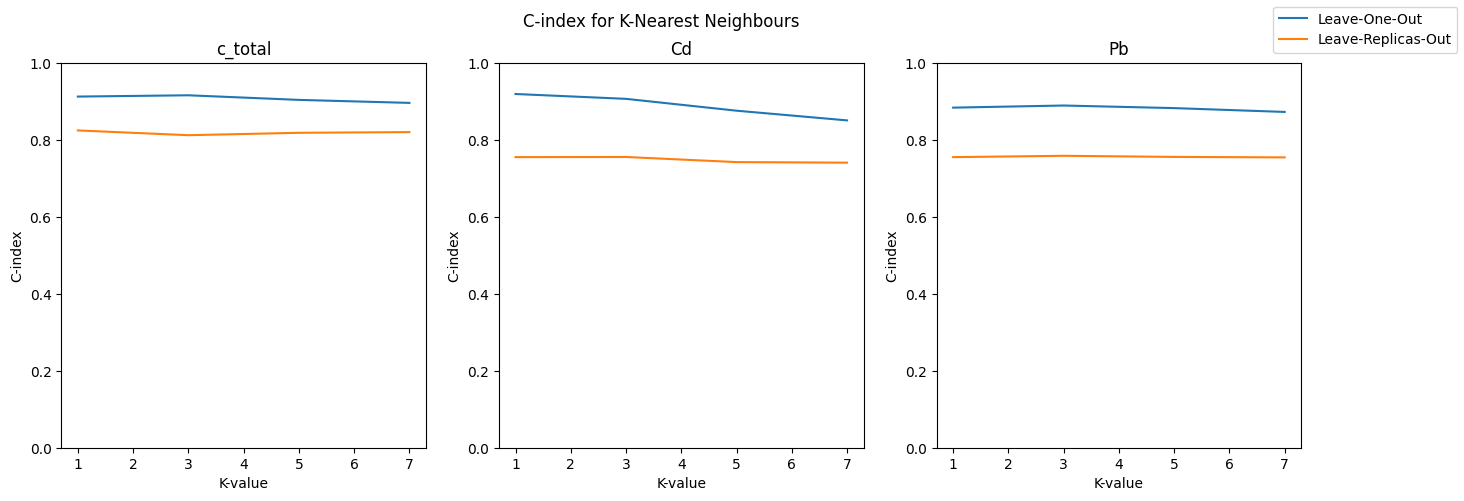

In [17]:
fig, axes = plt.subplots(1,3, figsize=(16,5))

axes[1].plot(loo_data[:4][1], loo_data[:4][2])
axes[1].plot(logo_data[:4][1], logo_data[:4][2])
axes[1].set_ylim(0,1)
axes[1].set_title('Cd')
axes[1].set_xlabel('K-value')
axes[1].set_ylabel('C-index')

axes[2].plot(loo_data[4:8][1], loo_data[4:8][2])
axes[2].plot(logo_data[4:8][1], logo_data[4:8][2])
axes[2].set_ylim(0,1)
axes[2].set_title('Pb')
axes[2].set_xlabel('K-value')
axes[2].set_ylabel('C-index')

axes[0].plot(loo_data[8:][1], loo_data[8:][2])
axes[0].plot(logo_data[8:][1], logo_data[8:][2])
axes[0].set_ylim(0,1)
axes[0].set_title('c_total')
axes[0].set_xlabel('K-value')
axes[0].set_ylabel('C-index')

fig.suptitle('C-index for K-Nearest Neighbours')
fig.legend(['Leave-One-Out', 'Leave-Replicas-Out'])

There probably is a better way of doing this plotting part, but I didn't figure it out so this is a somewhat brute-forced solution for the plotting. It doesn't scale well if the dataset was larger because it is manually created and labelled.

## Interpretation of results
#### Answer the following questions based on the results obtained
1. Which cross-validation approach produced more optimistic results, and why?
2. Which cross-validation method provides a better estimate of the model's performance on unseen mixtures? Explain your answer.

#### Answers:

1. Leave-One-Out cross-validation produced more optimistic results and it did it because the data contains dependent duplicates. In the process of testing and training with each value, the testing data becomes contaminated with the duplicate values so that the model learns to predict the test data from the training data. This causes overfitting in the final model so the C-index value is better with the model.

2. The second model uses Leave-Replicas-Out cross-validation which removes the problem of the data leaking from the testing data to the training data. This means that this model is better suited for predicting an unseen mixture.

## AI usage disclaimer

In [18]:
# In case AI was used to solve the exercise, please explain how and in which parts it was used.